<h1><center><b>Δημιουργία Δεδομένων Μοντέλου</b></center></h1>

Θα ξεκινήσουμε __αρχικοποιώντας__ τα δεδομένα που απαιτούνται για την __δημιουργία__, __εκπαίδευση__ και __δοκιμή__ του _μοντέλου μηχανικής μάθησης_. Αυτό περιλαμβάνει 2 στάδια:
* __Κατέβασμα μουσικής__ από το <a href="https://www.youtube.com/">YouTube</a>
* __Μετατροπή αρχείων__ σε κατάλληλα _δεδομένα εισόδου_ για το μοντέλο, τα οποία λέγονται __φασματογραφήματα__ (<a href="https://en.wikipedia.org/wiki/Spectrogram#:~:text=A%20spectrogram%20is%20a%20visual,sonographs%2C%20voiceprints%2C%20or%20voicegrams.">spectograms</a>)

# Κατέβασμα Μουσικής

Αρχικά θα __κατεβάσουμε__ μερικά τραγούδια από το <a href="https://www.youtube.com/">YouTube</a> και θα τα αποθηκεύσουμε στο __τοπικό__ μας __υπολογιστή__. Τα είδη μουσικής με τα οποία θα δουλέψουμε είναι __4__ και συγκεκριμένα:
* Κλασσική μουσική
* Hiphop 
* Rock 
* Blues

Θα φροντίσουμε να κατεβάσουμε κάποιο συγκεκριμένο __αριθμό__ από __τραγούδια__ της κάθε __κατηγορίας__, προκειμένου να έχουμε μία πληθώρα δεδομένων για __εκπαίδευση__, __εύρεση υπερπαραμέτρων__ και __αξιολόγηση__. Παρακάτω παρέχονται τα urls των τραγουδιών της κάθε κατηγορίας τα οποία θα επιχειρήσουμε να __κατεβάσουμε__ και __αποθηκεύσουμε__:

<!--
1. __Κλασσική Μουσική__:
    * https://www.youtube.com/watch?v=P2l0lbn5TVg
    * https://www.youtube.com/watch?v=axb48YrvRmw
    * https://www.youtube.com/watch?v=yLFdeIV_YPo
    * https://www.youtube.com/watch?v=d_92G-Dgscw
    * https://www.youtube.com/watch?v=HAi5QGPk8sM
2. __Hiphop__:
    * https://www.youtube.com/watch?v=Z4N8lzKNfy4
    * https://www.youtube.com/watch?v=fV5NzrTmqZM
    * https://www.youtube.com/watch?v=4nyld2SqleU
    * https://www.youtube.com/watch?v=WlaGHS_qs58
    * https://www.youtube.com/watch?v=gZFmMoeU5m0
3. __Rock__:
    * https://www.youtube.com/watch?v=kXYiU_JCYtU
    * https://www.youtube.com/watch?v=8SbUC-UaAxE
    * https://www.youtube.com/watch?v=fJ9rUzIMcZQ
    * https://www.youtube.com/watch?v=hTWKbfoikeg
    * https://www.youtube.com/watch?v=0GXFXrXWoCM
4. __Blues__:
    * https://www.youtube.com/watch?v=4zAThXFOy2c
    * https://www.youtube.com/watch?v=71Gt46aX9Z4
    * https://www.youtube.com/watch?v=OPHa2eHfsyE
    * https://www.youtube.com/watch?v=SgXSomPE_FY
    * https://www.youtube.com/watch?v=ioOzsi9aHQQ

<table>
<tr><th >Κλασσική Μουσική <th><th> HipHop <th><th> Rock <th><th> Blues <tr><tr>
    <tr><td> 1.<a href="https://www.youtube.com/watch?v=P2l0lbn5TVg">https://www.youtube.com/watch?v=P2l0lbn5TVg</a> 
    <td><td> 1.<a href="https://www.youtube.com/watch?v=Z4N8lzKNfy4">https://www.youtube.com/watch?v=Z4N8lzKNfy4</a> 
    <td><td> 1.<a href="https://www.youtube.com/watch?v=kXYiU_JCYtU">https://www.youtube.com/watch?v=kXYiU_JCYtU</a>
    <td><td> 1.<a href="https://www.youtube.com/watch?v=4zAThXFOy2c">https://www.youtube.com/watch?v=4zAThXFOy2c</a>
<td><tr>
    <tr><td> 2.<a href="https://www.youtube.com/watch?v=axb48YrvRmw">https://www.youtube.com/watch?v=axb48YrvRmw</a> 
    <td><td> 2.<a href="https://www.youtube.com/watch?v=fV5NzrTmqZM">https://www.youtube.com/watch?v=fV5NzrTmqZM</a> 
    <td><td> 2.<a href="https://www.youtube.com/watch?v=8SbUC-UaAxE">https://www.youtube.com/watch?v=8SbUC-UaAxE</a>
    <td><td> 2.<a href="https://www.youtube.com/watch?v=71Gt46aX9Z4">https://www.youtube.com/watch?v=71Gt46aX9Z4</a>
<td><tr>
    <tr><td> 3.<a href="https://www.youtube.com/watch?v=yLFdeIV_YPo">https://www.youtube.com/watch?v=yLFdeIV_YPo</a> 
    <td><td> 3.<a href="https://www.youtube.com/watch?v=4nyld2SqleU">https://www.youtube.com/watch?v=4nyld2SqleU</a> 
    <td><td> 3.<a href="https://www.youtube.com/watch?v=fJ9rUzIMcZQ">https://www.youtube.com/watch?v=fJ9rUzIMcZQ</a>
    <td><td> 3.<a href="https://www.youtube.com/watch?v=OPHa2eHfsyE">https://www.youtube.com/watch?v=OPHa2eHfsyE</a>
<td><tr>
    <tr><td> 4.<a href="https://www.youtube.com/watch?v=d_92G-Dgscw">https://www.youtube.com/watch?v=d_92G-Dgscw</a> 
    <td><td> 4.<a href="https://www.youtube.com/watch?v=WlaGHS_qs58">https://www.youtube.com/watch?v=WlaGHS_qs58</a> 
    <td><td> 4.<a href="https://www.youtube.com/watch?v=hTWKbfoikeg">https://www.youtube.com/watch?v=hTWKbfoikeg</a>
    <td><td> 4.<a href="https://www.youtube.com/watch?v=SgXSomPE_FY">https://www.youtube.com/watch?v=SgXSomPE_FY</a>
<td><tr>
    <tr><td> 5.<a href="https://www.youtube.com/watch?v=HAi5QGPk8sM">https://www.youtube.com/watch?v=HAi5QGPk8sM</a> 
    <td><td> 5.<a href="https://www.youtube.com/watch?v=gZFmMoeU5m0">https://www.youtube.com/watch?v=gZFmMoeU5m0</a> 
    <td><td> 5.<a href="https://www.youtube.com/watch?v=0GXFXrXWoCM">https://www.youtube.com/watch?v=0GXFXrXWoCM</a>
    <td><td> 5.<a href="https://www.youtube.com/watch?v=ioOzsi9aHQQ">https://www.youtube.com/watch?v=ioOzsi9aHQQ</a>
<td><tr>
<table>

-->

| __Κλασσική Μουσική__ | __HipHop__ | __Rock__ | __Blues__ | 
|:----|:----|:----|:----|
|https://www.youtube.com/watch?v=P2l0lbn5TVg|https://www.youtube.com/watch?v=Z4N8lzKNfy4|https://www.youtube.com/watch?v=kXYiU_JCYtU   |https://www.youtube.com/watch?v=4zAThXFOy2c| \\
|https://www.youtube.com/watch?v=axb48YrvRmw|https://www.youtube.com/watch?v=fV5NzrTmqZM|https://www.youtube.com/watch?v=8SbUC-UaAxE|https://www.youtube.com/watch?v=71Gt46aX9Z4| \\
|https://www.youtube.com/watch?v=yLFdeIV_YPo|https://www.youtube.com/watch?v=4nyld2SqleU|https://www.youtube.com/watch?v=fJ9rUzIMcZQ|https://www.youtube.com/watch?v=OPHa2eHfsyE| \\
|https://www.youtube.com/watch?v=d_92G-Dgscw|https://www.youtube.com/watch?v=WlaGHS_qs58|https://www.youtube.com/watch?v=hTWKbfoikeg|https://www.youtube.com/watch?v=SgXSomPE_FY| \\
|https://www.youtube.com/watch?v=HAi5QGPk8sM|https://www.youtube.com/watch?v=gZFmMoeU5m0|https://www.youtube.com/watch?v=0GXFXrXWoCM|https://www.youtube.com/watch?v=ioOzsi9aHQQ| \\



Τα παραπάνω urls έχουν αποθηκευτεί στο φάκελο `/Data/Songs_urls/`, το κάθε ένα στο δικό του υποφάκελο ο οποίος αντιπροσωπεύει την κατηγορία στην οποία ανήκει. Σε όλο το project θα χρησιμοποιήσουμε τη γλώσσα προγραμματισμού <a href="https://en.wikipedia.org/wiki/Python_(programming_language)">Python</a>.

Αρχικά θα προσθέσουμε μία συνάρτηση η οποία λειτουργεί ως βοήθεια στο να εντοπίζουμε αυτόματα ολόκληρο το μονοπάτι ενός προορισμού στο εκάστωτε σύστημα. Η συνάρτηση αυτή έχει προμηθευτεί από το <a href="https://stackoverflow.com/">StackOverflow</a> και συγκεκριμένα από το σύνδεσμο:

https://stackoverflow.com/questions/31836104/pyinstaller-and-onefile-how-to-include-an-image-in-the-exe-file

In [1]:
import os

def resource_path(relative_path):
    """ Supporting function to receive the full path of a destination, on the current system. Provided from: 
        https://stackoverflow.com/questions/31836104/pyinstaller-and-onefile-how-to-include-an-image-in-the-exe-file """
    
    try:
        base_path = sys._MEIPASS2
    except Exception:
        base_path = os.path.abspath(".")

    return os.path.join(base_path, relative_path)

Για να κατεβάσουμε μουσική από το διαδίκτυο θα χρησιμοποιήσουμε ένα module ονόματι <a href="https://pytube.io/en/latest/">pytube</a>. Ας δημιουργήσουμε μία __συνάρτηση__ `download_music()` η οποία δοσμένου ενός _youtube url_ κατεβάζει το αντίστοιχο βίντεο και το αποθηκέυει σε μορφή __.mp3__ στο φάκελο `/Data/Music/`

In [2]:
from pytube import YouTube
import os

def download_music(url: str, category: str) -> bool:
    """ Downloads a youtube video from YouTube according to its given url, and saves it 
        in a .mp3 format """

    with open(resource_path(f'../Data/Music/downloaded.txt'), 'r') as fp:
        lines = fp.readlines()
        for downloaded_url in lines:
            #print(downloaded_url, url)
            if downloaded_url == url:
                return False
    
    # Create a YouTube object and pass the given video url, and extract only its audio
    yt = YouTube(url)
    video = yt.streams.filter(only_audio=True).first()

    # Download the mp3 file in an appropriate destination
    out_file = video.download(output_path=resource_path(f"..\\Data\\Music\\{category}"))

    # Save the file
    base, ext = os.path.splitext(out_file) 
    new_file = base + '.mp3'
    os.rename(out_file, new_file)

    with open(resource_path(f'../Data/Music/downloaded.txt'), 'a') as fp:
        fp.write(url)

    return True

Στη συνέχεια θα διατρέξουμε τα αποθηκευμένα urls και θα κατεβάσουμε τα τραγούδια τους χρησιμοποιώντας τη παραπάνω συνάρτηση.

In [3]:
import os

# Define a list with the categories we have
CATEGORIES_NAMES = ['blues', 'classical', 'hiphop', 'rock']
CATEGORIES_CODES = ['0', '1', '2', '3']

# Loop through every url of every category and download its video from youtube abd save it as an mp3 format
for category in CATEGORIES_NAMES:
    with open(resource_path(f'../Data/Songs_urls/{category}.txt'), 'r') as fp:
        for url in fp.readlines():
            download_music(url, category)

print("Download Process Done!")

Download Process Done!


# Μετατροπή Αρχείων σε Φασματογραφήματα (Spectograms)

Έχοντας κατεβάσει επιτυχώς τα τραγούδια μας θα τα __μετασχηματίσουμε__ σε κατάλληλη __μορφή__ για την είσοδο του μοντέλου μας. Αυτή η μορφή λέγεται __<a href="https://en.wikipedia.org/wiki/Spectrogram#:~:text=A%20spectrogram%20is%20a%20visual,sonographs%2C%20voiceprints%2C%20or%20voicegrams.">φασματογράφημα</a>__. Για αρχή θα αποθηκεύσουμε τα ηχητικά μας αρχεία σε μορφή <a href="https://en.wikipedia.org/wiki/Waveform">audio waveform</a>, έτσι ώστε να μπορούμε αργότερα να εξάγουμε το φασματογράφημα του καθενός. Γι' αυτό θα χρησιμοποιήσουμε το πακέτο <a href="https://librosa.org/doc/latest/index.html">librosa</a> της Python.

In [4]:
import warnings
from glob import glob
import librosa
import librosa.display

warnings.filterwarnings('ignore') # Just to ignore some warnings below

# Create a dictionary that will keep all the audio waveforms of each category
music_audio = {key: [] for key in CATEGORIES_NAMES}

# Loop through every audio in every category and store its waveform
for category in CATEGORIES_NAMES:
    audio_files = glob(resource_path(f'../Data/Music/{category}/*.mp3'))

    # Extract the waveform of the audios
    for audio_file in audio_files:
        audio_samples, sampling_rate = librosa.load(audio_file)
        music_audio[category].append((audio_samples, sampling_rate, audio_file))


Έχοντας εξάγει τα __waveforms__ όλων των τραγουδιών που έχουμε συμπεριλάβει στο project, ας οπτικοποιήσουμε μερικά από αυτά, χρησιμοποιώντας τη βιβλιοθήκη της Python <a href="https://matplotlib.org/">Matplotlib</a>. Συγκεκριμένα θα δημιουργήσουμε ένα διάγραμμα με __4 waveforms__, το πρώτο για κάθε κατηγορία μουσικής.

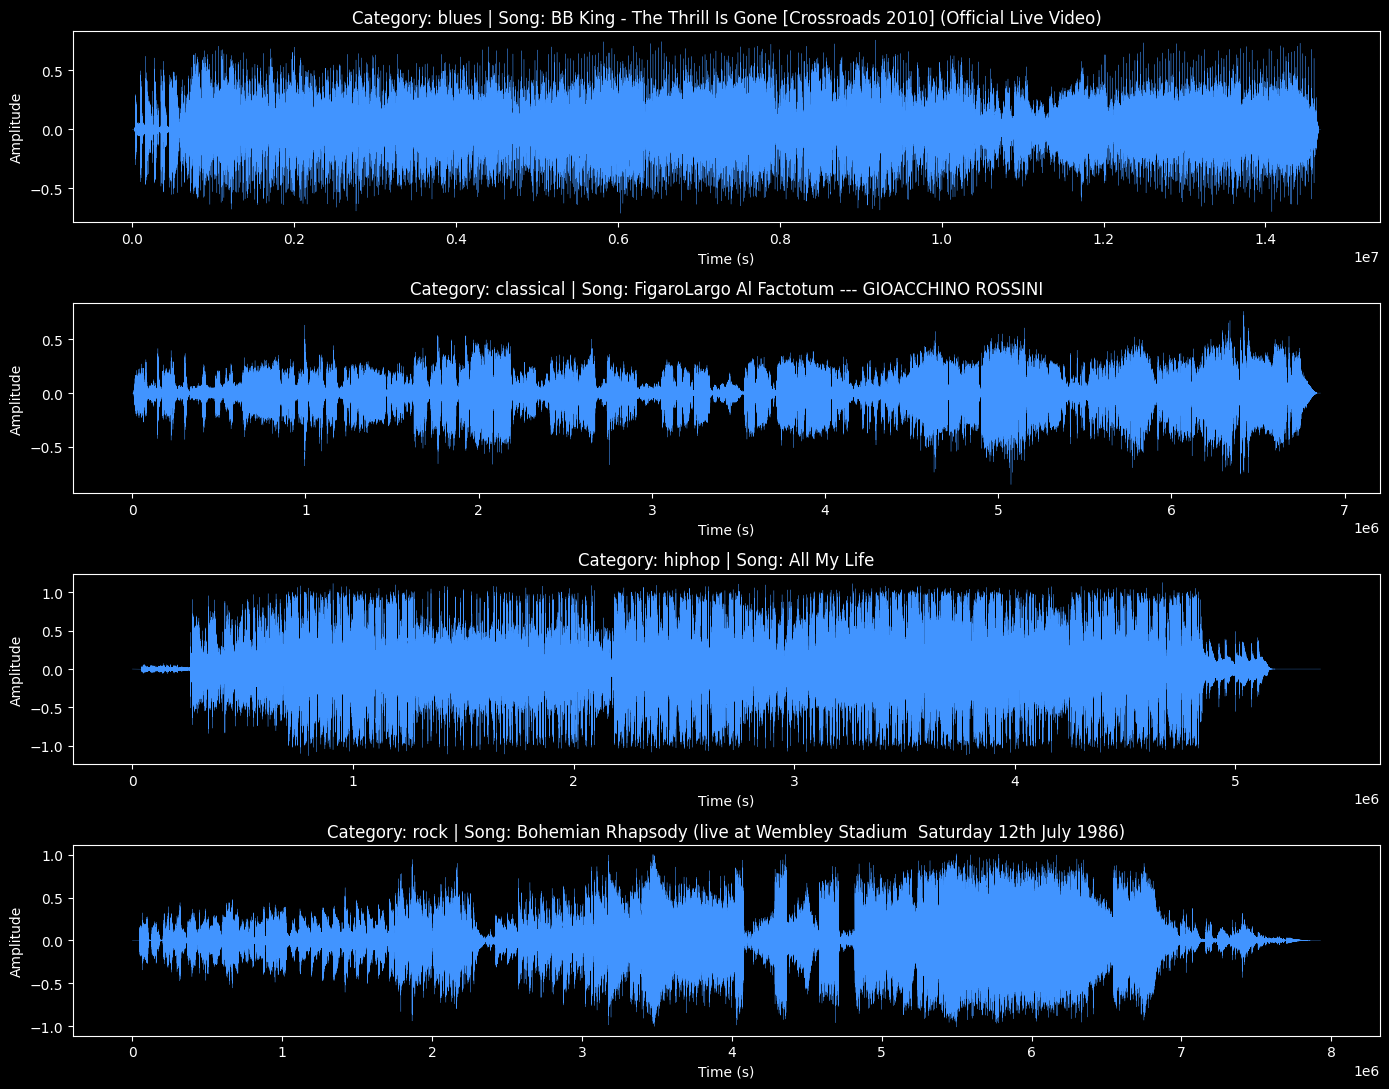

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

SAMPLE_TO_SHOW = 0 # The first sample

style = 'dark_background' # 'default'
plt.style.use(style)

fig, ax = plt.subplots(4, 1, figsize=(14, 11))

# Plot the waveforms
for i, category in enumerate(CATEGORIES_NAMES):
    y = music_audio[category][SAMPLE_TO_SHOW][0]
    ax[i].plot(range(len(y)), y, linewidth=0.2, color='#4194FF')
    ax[i].set_title("Category: " + category + " | Song: " + music_audio[category][0][2].split('\\')[-1][:-4])
    ax[i].set_xlabel('Time (s)')
    ax[i].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

Στη συνέχεια θα εξάγουμε τα __φασματογραφήματα__ των waveforms που μόλις λάβαμε.

In [6]:
import librosa
import numpy as np

music_spectograms = {key: [] for key in CATEGORIES_NAMES}

for category in CATEGORIES_NAMES:
    for i in range(len(music_audio[category])):
        D = librosa.stft(music_audio[category][i][0])
        S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
        music_spectograms[category].append(S_db)


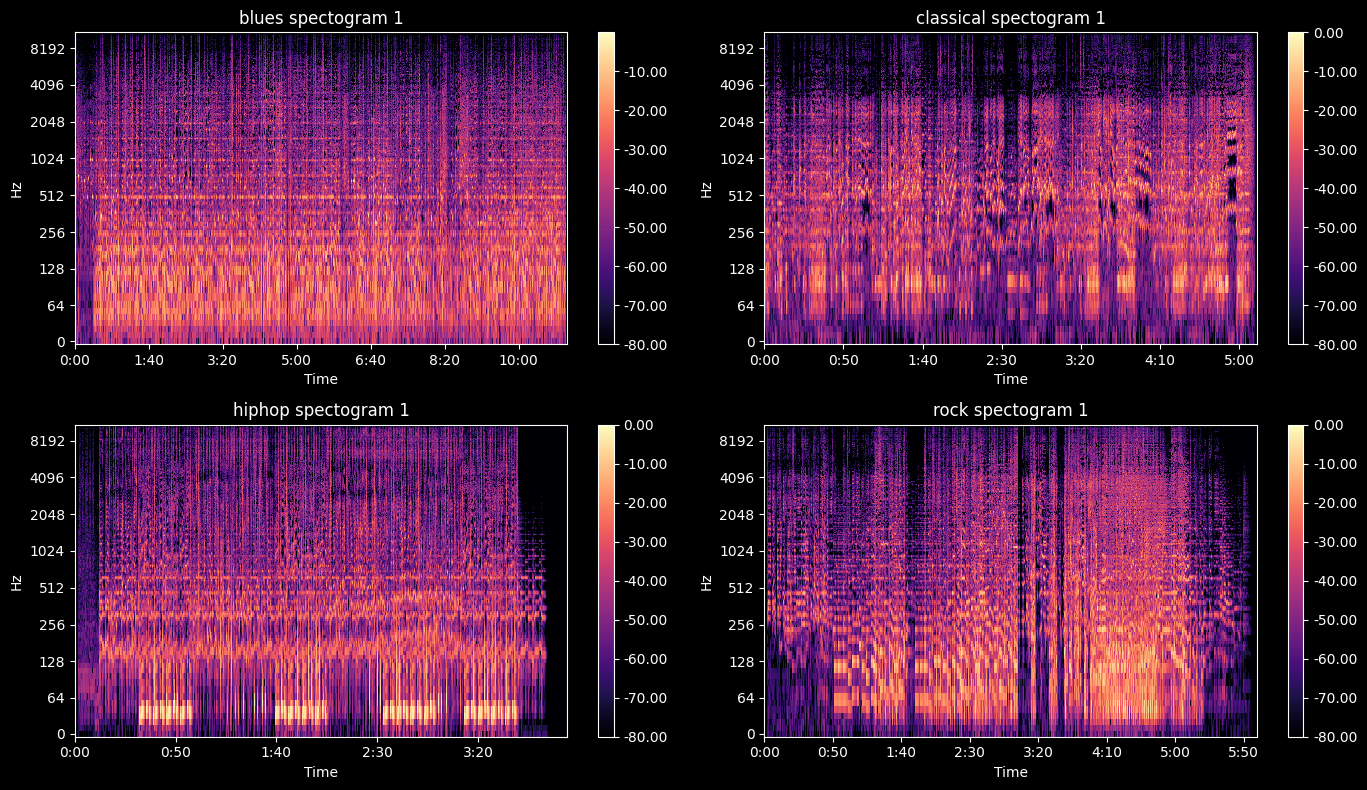

In [7]:
import librosa.display

SAMPLE_TO_SHOW = 0 # The first sample

categories = ((CATEGORIES_NAMES[0], CATEGORIES_NAMES[1]), (CATEGORIES_NAMES[2], CATEGORIES_NAMES[3]))

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

for i in range(len(categories)):
    for j in range(len(categories[i])):
        #random_sample = randrange(0, len(music_audio[category]))
        img = librosa.display.specshow(
            music_spectograms[categories[i][j]][SAMPLE_TO_SHOW], x_axis='time', y_axis='log', ax=axes[i][j])
        
        axes[i][j].set_title(f"{categories[i][j]} spectogram {SAMPLE_TO_SHOW + 1}")
        fig.colorbar(img, ax=axes[i][j], format='%0.2f')
    
plt.tight_layout()
plt.show()

In [8]:
print(len(music_audio['classical'][0][0]))

6861824
